# Theory
## Machine Learning vs Deep Learning
- Data science generates insights and effects from statistical modelling and/or processes
- Machine learning refers to non-neuron-based methods
- Machine learning is often less brute force, resulting in less time/space resource utilization
  - Sometimes more interpretable
  - Some algorithms like Gaussian Process fitting even integrate uncertainty
  - Can still have great performance especially in ensembles
- *Will discuss only deep learning and demo only deep learning*

## Density Functions
Probability density function (PDF): pdf(x) or p(x)
- x represents some value, continuous or discrete
- p(x) represents its relative probability
  - when x is continuous, often p(x) is normalized: integral of xp(x) = 1
- often for probabilities on non-infinite intervals: integral from x1 to x2 of p(x)
    - or expectation: E[X | x1 <= x <= x2] = integral of x1 to x2 of xp(x)

Cumulative density function (CDF): cdf(x)
- indefinite integral of p(x)
- used in finance as risk measure
  - alpha = 1 - confidence
  - previously value-at-risk (VAR) was used: cdf^-1(alpha)
  - however, now conditional value at risk (CVAR) is used: E[X | x <= VAR]
    - because VAR was only a point measure, not a true expectation

## 0.1. Stages of Inference (regression, classification, etc)
0. End Goal
  - Infererence is understanding the relationship between some independent variable(s) and some dependent variable(s)
  - More specific for extrapolation from known samples to future samples
  - Ultimately, *generalization* to the population of interest
1. Data acquisition
  - Acquire data that intuitively or known by industry to predict with low error
2. Data cleaning
  - Validity
    - deal with nulls by dropping rows/columns or imputation
    - deal with "duplicates" by dropping or even keeping if frequency data useful
    - check data type, set membership, order, etc
  - Completeness: check if data accounted for at expense level
3. Data augmentation
  - Often, data is transformed to product more samples for training
  - Aided by apriori knowledge of generating process
    - For example, affine transformations may be created for image classification training
    - However, be careful because, even in that example, the augment pictures may not be representative due to homographic effects or how the camera will be used in production
      - Or too many augmented images could skew the model
5. Feature creation
  - Required
    - Categorical features must be encoded
      - Continuous: related categories are mapped to a continuous variable
      - One hot: each category is given its own cell
        - More memory than binary, but often better
      - Binary: each category is given its own permutation of cells dedicated to encoding
    - Feature scaling: some algorithms require normalization and/or standardization
      - Min max: features are fit and normalized to min / max
      - Standard: features are fit and normalized, such that the mean is 0 and standard deviation is 1
  - Optional
    - Outlier removal: outliers are removed or threshold for stability or business needs
    - Aggregations: mean, median, mode, etc
    - Extraction: features like date can be broken up into day, week, day of week, etc
    - General transform: features can be transformed, often to exploit model structure to improve performance
      - E.g. like choosing transforming a feature to make it linear with respect to the output
6. Feature and model selection
  - Often, feature and model selection are integrated
  - Feature selection
    - Variance: there is no information in zero range features, so often features are discarded through intuition to save computational power
    - Univariate correlation: univariate correlation coefficients thresholded. Weaknesses is that combination of weak features can be strong
    - Feature elimination: for linear models specific, recursive feature elimination (RFE) and related algorithms used. Can make them more robust by removing indeterminancy
    - Sequential feature selection: for any algorithm. Features added or removed sequentially and cross-validation used determine when to stop
    - Handmade: configurations tested from expert knowledge
    - Automated: features can be integrated into model hyperparameter optimization
  - Model selection
    - Method: metrics are compared to choose the best model. The model settings and other variables affecting the outcome are called hyperparameters. Hyperparameter optimization is important and there are libraries for it
    - Metrics: some are simple/broad and some are complex to suit the exact goal
    - Validation structure
      - Yolo: train a model from all data, risky and only ever done if:
        - data and model structure trusted
        - maximal performance needed
      - Simple: data split into train and test, often 70/30
      - Cross-validation: data split into multiple train and test sets
        - called k-folds when equally split
        - time-series splits
          - rolling window
          - expanding window
        - look-ahead bias is where training requires data from the future: cannot be implemented and yields deceivingly optimist results
7. Deployment
  - Parameters to models can be saved
  - Quantization can be used to save computational resources / money
  - Models can be automatically monitored and updated
    - Often makes sense to simulate update schedule in cross-validation
  - There is specialized inference-only hardware for deployment

## 0.2. Common Tensorflow Keras Layer Types
- Input/output: for data
- Dense
  - defined by input/layer/output width, trained weight/bias, and activation
  - activation layers: dense layer without trained weight/bias
    - relu used for regression to address vanishing gradient
    - softmax used for classification to create probability-distribution-like output
  - locally-connected layers: useful to exploit known time/space locality
- Preprocessing: various layers that encode, vectorize, or otherwise augment
  - With easy GPU-acceleration
  - Embedding layers: related, but for NLP vectorization
  - Masking layers: related, but for time-series masking
- Normalization: normalizes output on some basis to improve training
- Regularization: introduces noise to improve robustness / overfitting
- Convolution: feature extracting layers, often for temporally-structured (time-series)
- Pooling: reduce dimensionality while retaining most important features
- Recurrent: cycle-including layers, often for temporally-structured (time-series)
- Attention: complementary to recurrent layers where long-term memory is needed
- Reshaping: does nothing but changes shape of data
- Merging: elementary options that also changes shape of data

## 1. Regression
- Continuous function estimation
- Losses: any of the metrics b/c gradient
- Metrics
  - Distribution summary
    - Quantile
      - Multiple quantiles to provide uncertainty insight or approximate full distribution
    - Mean absolute error (MAE): sum[true - pred]/N
      - outputs median/50th quantile
    - Root / mean squared error (R/MSE): sqrt(sum[(true - pred)^2])/N
      - outputs mean
      - emphasizes outlier errors
  - Cosine similarity: sum(normalized_dot_product(true, pred))
    - used when only distance between output matters

## 2. Classification
- Discrete class function estimation 
- Losses: must use cross-entropy b/c gradient needed
  - select based on output encoding
- Metrics:
  - Confusion Matrix
    - matrix showing counts with with ground truth and predict axes
    - basis for most metrics
    - in binary case: 
      - true positive/negative
      - false positive (type I error): predicted true, actually false
      - false negative (type II error): predicted false, actually true
    - AUC common for Receiver operator characteristic (ROC) and Precision-Recall (PR) as summary metric
  - Binary (F: false, T: True, N: negative, P: positive, A: all)
    - FN/FP/TN/TP: each can have consequence
    - Accuracy: (TP + TN)/A
      - Good when TP and TN equally important
    - Tradeoffs when unbalanced
      - Balanced Accuracy: (TPR + TNR)/2, good when TP and TN both important
        - Geometric mean of sensitivity and specificity
        - True positive rate (TPR) or Sensitivity: TP/(TP + FN) = TP/(True ground truth)
        - True negative rate (TNR) or Specificity: TN/(TN + FP) = TN/(False ground truth)
      - F1-score: 2*(Precision * Recall)/(Precision + Recall), good when only TP important
        - Harmonic mean of precision and recall
        - Does not account for TN at all
        - Precision: TP/(TP + FP) = TP/(True predictions)
          - Discriminates against FP
        - Recall: TP/(TP + FN) = TP/(True ground truth), same as sensitivity
          - Discriminates against FN
  - Cross-entropy: all indirect minimization of KL-divergence, difference is encoding type
    - Binary / log loss: each [0, 1] label represents two outcomes that are mutually exclusive
    - Categorical: each [0, 1] label in a group represents mutually exclusive outcomes
    - Sparse categorical: each label represents mutually exclusive outcomes with interval

## 3. Object Detection
- Multiple class/position estimation
- Algorithms
  - ML
    - Feature Extractors
      - SIFT
      - HOG
    - Classifiers
      - SVM
      - XGBoost
  - DL
    - 3D
      - Monocular
      - Point-cloud
      - Point-net
    - 2D
      - Two stage
        - Typically more accurate/slower than single shot detectors
          - Better for offline operation, while single shot is better for real-time
        - Typically also trained in two stages
        - External region proposal: use selective search, edge boxes, etc for CNN input
          - Rely on traditional object detectors
          - RCNN
            - Image => SS => ROI => CNN => [classs / BBox offset]
            - Input images could be warped for flexibility, but reduces accuracy
          - Fast RCNN:
            - Image => CNN => ROI_pool_1 => dense_1 => [classs / BBox offset]
                    ========>
              ...
                           => ROI_pool_n => dense_n => [classs / BBox offset]_n
                    ========>
              - ROI pools reuse in
            - More computationally efficient because feature map reused
        - Region Proposal Network
          - Do not rely on traditional object detectors
          - Faster RCNN
            - Selective search replaced by faster, more accurate region proposal network (RPN)
            - Use k anchor boxes of different sizes / aspects => 3x3xk boxes inside the RPN
      - Single shot
        - You only look once (YOLO)
          - Refers to one particular model
          - Faster than SSD
          - Used two dense layers 
            - Instead of SSD's CNN
          - Multiple BBox candidates => IoU non-maximal suppression => BBox
            - Instead of SSD's BBox regression
        - Single shot detector (SSD)
          - Generic term
          - Faster than RetinaNet
          - Usually more accurate than YOLO
        - RetinaNet
          - Usually more accurate than SSD
- Losses: combination of MAE, MSE, and 
- Metrics
  - Binary metrics from classification can be used, consider the class predictions
  - Mean intersection over Union (MeanIoU):
    - Intersection/union
      - Or TP / (A - TN)
    - Efficient calculation for rectangles
    - 0 <= MeanIoU <= 1

## 4. Reinforcement Learning
- Reward maximization under defined conditions
- Components: note most values will be approximations
  - State: s
  - Action: a
  - Policy: pi(s, a)
  - Value: v_pi(s): value of state, given policy
- Action space
  - Discrete
  - Continuous
- Algorithms
  - Model-based
    - Planning: fully defined state transition, very computationally expensive
      - Markov decision processes: as long as state can approximated
        - Policy iteration (faster than value iteration)
        - Leads to actor critic network
      - Continuous non-linear systems
        - Dynamic programming for model predictive control (MPC) / optimal control
          - Leads to deep MPC
    - Specific Projects
      - World Models
      - Imagination-augmented Agents (I2A)
      - Model-based Deep Reinforcement Learning with Model-Free Fine-Tuning (MBMF)
      - Model-based Value Estimation (MBVE)
  - Model-free
    - Currently more popular
    - Gradient-free: does not require domain knowledge
      - Value-based stem from Bellman optimality equation, assuming Markov
      - Off-policy learning: learn general action-value
        - Converges to optimal policy with enough samples
        - Able to reuse replay buffer
          - Able to use existing off-policy samples
            - Sample-efficient, but slower convergence
          - Compatible with imitation
          - Parallel experience generation
        - Q-learning
          - Value-based/offline
          - Leads to deep Q network (DQN)
      - On-policy (greedy) learning: learn specific state-value
        - Converges to locally-optimal policy
        - Often converges more quickly than Q-learning
        - SARSA-max (State - action- reward - state -action)
          - Value-based/online
    - Gradient-based
      - Policy-gradient-based maximize expectation of return distribution of trajectory (state-action sequence), given parameters of differentiable policy
        - Vanilla Policy Gradient (VPG):
          - Noisy: maximize logP(u|s, theta)R
          - Less noisy: maximize logP(u|s, theta)A
            - State-dependent baseline reduces estimate variance without shifting mean
          - constant policy learning rate
        - Trust region policy optimization (TRPO): dynamic policy learning rate based on KL divergence constraint
        - Proximal Policy (PPO): integrates KL divergence constraint o TRPO into loss
          - Policy-based/online
          - Able to use unconstrained optimizers
          - Clipped PPO / V2 is most popular
      - Often more compute0efficent than value-based
      - requires differentiability
      - may be more sensitive to hyperparameters with noisy environment
      - Can be used for continuous action spaces
- Losses
  - Reward: optimized value at end of single time step
    - May be delayed (win / lose) or sparse
      - Delay leads to credit assignment problem
      - Sparsity leads to slow learning due to flat state-action value
        1. Reward shaping: successful, but manual manipulation may lead to unexpected result
        2. Curiosity-driven: use autoencoder-like to assess calculate reconstruction erorr or "surprise" and use this as signal to explore state-actions
        3. Hindsight-experience replay (HER): redefine the "bad episode" loss to include reward
  - Return: sum of reward at end of episode
    - Discount factor often used to prioritize immediate rewards
    - Could use one when termination is guaranteed
    - In theory, discount factors used to deal with cyclic MDPs
- Metrics
  - Discounted return
  - Time steps to complete
  - Episode success rate

In [199]:
# GENERATE BATTLE SHIP BOARD
import numpy
from functools import cache

@cache
def generate_possible_ship_locations(ship_length = 3, # ship_length >= 2
                                     board_length = 10,
                                     board_width = 10):
    possible_ship_locations = []

    # generate vertical ships
    for row_start_index in range(board_length - ship_length + 1):
        row_stop_index = row_start_index + ship_length
        for column_start_index in range(board_width):
            possible_ship_locations.append({(row, column_start_index) for row in range(row_start_index, row_stop_index)})

    # generate horizontal ships
    for column_start_index in range(board_length - ship_length + 1):
        column_stop_index = column_start_index + ship_length
        for row_start_index in range(board_width):
            possible_ship_locations.append({(row_start_index, column) for column in range(column_start_index, column_stop_index)})

    return possible_ship_locations

def generate_battle_ship_board(ship_lengths,
                               board_length,
                               board_width,
                               dtype = numpy.int32):
    # randomize ship placement order because more spots for initial placements
    ship_lengths = ship_lengths.copy() if isinstance(ship_lengths, list) else list(ship_lengths)
    numpy.random.shuffle(ship_lengths)

    # repeat until board generated
    battle_ship_board = numpy.zeros((board_length, board_width), dtype)
    while battle_ship_board.sum() != sum(ship_lengths):
        # empty board
        battle_ship_board = numpy.zeros((board_length, board_width), dtype)

        # get possible placements
        possible_ship_locations = {}
        for ship_length in set(ship_lengths):
            possible_ship_locations[ship_length] = generate_possible_ship_locations(ship_length, board_length, board_width)

        # place ships
        for ship_index, ship_length in enumerate(ship_lengths):
            # if not possible, return none
            if len(possible_ship_locations[ship_length]) == 0:
                battle_ship_board = None
                break
            else: # else choose random ship location
                ship_location = numpy.random.choice(possible_ship_locations[ship_length])

                # for each piece
                for ship_location_component in ship_location:
                    # place it
                    battle_ship_board[ship_location_component[0]][ship_location_component[1]] = 1

                    # eliminate possibilities for future placements
                    if ship_index < (len(ship_lengths) - 1):
                        for eliminated_ship_length in possible_ship_locations.keys():
                            possible_ship_locations[eliminated_ship_length] = [x for x in possible_ship_locations[eliminated_ship_length] if ship_location_component not in x]                    

    # return board
    return battle_ship_board

In [200]:
# GENERATE BATTLE SHIP BOARD DEMO
generate_battle_ship_board((2, 3, 3, 4, 5), 10, 10)

array([[0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [201]:
# CUSTOM BATTLE SHIP ENVIRONMENT
import tensorflow
from tf_agents.environments.py_environment import PyEnvironment
from tf_agents.environments.tf_py_environment import TFPyEnvironment
from tf_agents.specs.array_spec import BoundedArraySpec
from tf_agents.trajectories import time_step as ts

class BattleShipPyEnvironment(PyEnvironment):
  def __init__(self,
               ship_lengths = None,
               board_length = 10,
               board_width = 10,
               discount_factor = 1, # no absorbing states, so unity discount factor okay
               dtype = numpy.int32):
    # handle muteable default
    if ship_lengths is None:
        ship_lengths = [2, 3, 3, 4, 5]

    # assert possible to fit ships, optimized out at runtime
    assert board_length*board_width >= sum(ship_lengths), f"Your ships will not fit in your {board_length}x{board_width} board"

    # environment parameters
    self._ship_lengths = ship_lengths
    self._board_length = board_length
    self._board_width = board_width
    self._discount_factor = discount_factor
    self._dtype = dtype
    self._winning_score = sum(ship_lengths)

    # initialization-dependent specs
    initial_action_space_size = self._board_length*self._board_width
    self._action_spec = BoundedArraySpec(shape = (),
                                         dtype = self._dtype,
                                         minimum = 0,
                                         maximum = initial_action_space_size - 1,
                                         name = "action")
    self._observation_spec = BoundedArraySpec(shape = (self._board_length, self._board_width),
                                              dtype = self._dtype,
                                              minimum = 0,
                                              maximum = 2,
                                              name = "observation")

    # initial state
    self._board = None
    self._clicks = None
    self._episode_ended = False

  def action_spec(self):
    return self._action_spec

  def observation_spec(self):
    return self._observation_spec
  
  @property
  def score(self):
    return (self.observable_state == 2).sum()

  @property
  def observable_state(self):
    # miss => 1, hit => 2
    return numpy.multiply(self._board, self._clicks) + self._clicks

  @property
  def action_mask(self):
    # haven't clicked => clickable
    return numpy.logical_not(self._clicks).astype(self._dtype).flatten()

  def _reset(self):
    self._board = generate_battle_ship_board(self._ship_lengths,
                                             self._board_length,
                                             self._board_width)
    self._clicks = numpy.zeros((self._board_length, self._board_width),
                               self._dtype)
    self._episode_ended = False

    # return start time step
    return ts.restart(observation = self.observable_state)

  def _step(self, action):
    # if last time step was end, ts is start
    if self._episode_ended:
      return self.reset()
    else:
      # record click and reward
      click_row = action//self._board_width
      click_column = action%self._board_width
      new_click = self._clicks[click_row][click_column] == 0
      ship_click = self._board[click_row][click_column] == 1
      self._clicks[click_row][click_column] = 1
      reward = -1 # situation 1: default

      # if won, ts is last
      if self.score >= self._winning_score:
        self._episode_ended = True
        reward = self._board_length*self._board_width # situation 2: win
        return ts.termination(observation  = self.observable_state,
                              reward = reward)
      else: # else, ts is mid
        if new_click and ship_click: # situation 3: hit ship
          reward = (self._board_length + self._board_width)/2
        elif not new_click: # situation 4: clicked previously clicked
          reward = -(self._board_length + self._board_width)
        return ts.transition(observation  = self.observable_state,
                             reward = reward,
                             discount = self._discount_factor)

In [240]:
# BATTLE BOT PARAMETERS
from tensorflow import optimizers, Variable
from tensorflow.keras import activations

# Game
# SHIP_SIZES = (2, 3, 3, 4, 5) # takes 24h to train
# BOARD_SIZE = 10
SHIP_SIZES = (3, )
BOARD_SIZE = 5

# Networks
# MAX_SHIP_SIZE = max(SHIP_SIZES)
# CONV_LAYER_KERNEL_SIZE = tuple([MAX_SHIP_SIZE]*2)
# CONV_LAYER_PARAMS =  [(16, CONV_LAYER_KERNEL_SIZE, 1)] # conv_layer_params fails due to lack of pooling
FC_LAYERS = 2 # depth
FC_UNITS_PER_LAYER = 128 # width
FC_LAYER_PARAMS = tuple([FC_UNITS_PER_LAYER]*FC_LAYERS) # convolution should be much better for convergence b/c clear spatial-structure

# Optimizers
LEARNING_RATE = 1e-4 # hyper parameter optimization would help
OPTIMIZER = optimizers.Adam(learning_rate = LEARNING_RATE)

# Agent
GREEDY_EVAL = False # sample from action distribution b/c no action masking, so agent could click same square repeatedly
IMPORTANCE_RATIO_CLIPPING = 0.1 # plausible change ratio, at 40000 episodes, (0.2, 10.5), (0.1, 9.5), (0.075, 14.5), (0.05, 9 jumping), (0.025, 9)
LAMBDA_VALUE = 0.9 # bias-variance trade-off, 1 => no bias
DISCOUNT_FACTOR = 1 # reward discount factor
USE_LAMBDA_ESTIMATE = True # return variance of both value and advantage estimators

# Training
EPISODES = 1e6
EPISODES_PER_ITERATION = 10
ITERATIONS = int(EPISODES/EPISODES_PER_ITERATION)
NUM_EPOCHS = 3

EPISODES_PER_PRINT = EPISODES_PER_ITERATION*10
ITERATIONS_PER_PRINT = int(EPISODES_PER_PRINT/EPISODES_PER_ITERATION)
PRINTS_TO_AVERAGE = 40

# Buffer
MAX_STEPS_PER_EPISODE = BOARD_SIZE*BOARD_SIZE*10
MAX_STEPS_BUFFER = int(MAX_STEPS_PER_EPISODE*EPISODES_PER_ITERATION)

# Evaluation
INITIAL_EVALUATION_EPISODES = 1
FINAL_EVALUATION_EPISODES = EPISODES_PER_ITERATION*100

In [203]:
# BATTLEBOT SETUP
from tf_agents.networks.actor_distribution_network import ActorDistributionNetwork
from tf_agents.networks.value_network import ValueNetwork
from tf_agents.networks.mask_splitter_network import MaskSplitterNetwork
from tf_agents.agents.ppo.ppo_clip_agent import PPOClipAgent
from tensorflow import optimizers, Variable
from tf_agents.utils.common import function
from tf_agents.policies.py_tf_eager_policy import PyTFEagerPolicy

# single environment
battle_ship_py_env = BattleShipPyEnvironment(ship_lengths = SHIP_SIZES,
                                             board_length = BOARD_SIZE,
                                             board_width = BOARD_SIZE)
battle_ship_env = TFPyEnvironment(battle_ship_py_env)

observation_spec = battle_ship_env.observation_spec()
action_spec = battle_ship_env.action_spec()

# actor network
actor_network = ActorDistributionNetwork(input_tensor_spec = observation_spec,
                                         output_tensor_spec = action_spec,
                                         fc_layer_params = FC_LAYER_PARAMS)

# critic network
value_network = ValueNetwork(input_tensor_spec = observation_spec,
                             fc_layer_params = FC_LAYER_PARAMS)

# agent with common optimizer
time_step_spec = battle_ship_env.time_step_spec()
train_step_counter = Variable(0)

battle_bot = PPOClipAgent(time_step_spec = time_step_spec,
                          action_spec = action_spec,
                          optimizer = OPTIMIZER,
                          actor_net = actor_network,
                          value_net = value_network,
                          greedy_eval = GREEDY_EVAL,
                          importance_ratio_clipping = IMPORTANCE_RATIO_CLIPPING,
                          lambda_value = LAMBDA_VALUE,
                          discount_factor = DISCOUNT_FACTOR,
                          num_epochs = NUM_EPOCHS,
                          use_gae = USE_LAMBDA_ESTIMATE,
                          use_td_lambda_return = USE_LAMBDA_ESTIMATE,
                          train_step_counter = train_step_counter)
battle_bot.initialize()

In [204]:
# OMG
from tf_agents.replay_buffers.tf_uniform_replay_buffer import TFUniformReplayBuffer
from tf_agents.drivers.dynamic_episode_driver import DynamicEpisodeDriver

# tf replay buffer for speed
battle_bot_collect_data_spec = battle_bot.collect_data_spec
replay_buffer = TFUniformReplayBuffer(data_spec = battle_bot_collect_data_spec,
                                      batch_size = 1,
                                      max_length = MAX_STEPS_BUFFER)

# driver
battle_bot_collect_policy = battle_bot.collect_policy
driver = DynamicEpisodeDriver(env = battle_ship_env,
                              policy = battle_bot_collect_policy,
                              observers = [replay_buffer.add_batch],
                              num_episodes = EPISODES_PER_ITERATION)

driver.run = function(driver.run,
                      autograph = False,
                      reduce_retracing = True)
battle_bot.train = function(battle_bot.train,
                            autograph = False,
                            reduce_retracing = True)

In [205]:
# BATTLE BOT BASELINES (based off https://www.tensorflow.org/agents/tutorials/1_dqn_tutorial)
from tf_agents.policies.random_tf_policy import RandomTFPolicy

def compute_avg_steps(environment, policy, num_episodes=10, episode_step_limit = 1e6):
  time_steps = 0
  total_return = 0.0
  for _ in range(num_episodes):
    time_step = environment.reset()
    episode_time_steps = 0
    while (not time_step.is_last()) and (episode_time_steps < episode_step_limit):
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      time_steps += 1
      episode_time_steps += 1
  return time_steps / num_episodes

random_policy = RandomTFPolicy(time_step_spec,
                               action_spec)
print(compute_avg_steps(battle_ship_env, random_policy, INITIAL_EVALUATION_EPISODES, MAX_STEPS_PER_EPISODE))
print(compute_avg_steps(battle_ship_env, battle_bot.policy, INITIAL_EVALUATION_EPISODES, MAX_STEPS_PER_EPISODE))

17.0
119.0


In [206]:
# BATTLE BOT TRAINING

# reset scores => separated for dev
step_counts = []

In [207]:
# BATTLE BOT TRAINING
battle_bot.train_step_counter.assign(0)
for iteration in range(ITERATIONS):
  driver.run(maximum_iterations = MAX_STEPS_BUFFER)
  trajectories = replay_buffer.gather_all()
  battle_bot.train(experience = trajectories)
  replay_buffer.clear()
  if iteration % ITERATIONS_PER_PRINT == 0:
    message = f"Iteration {iteration + 1}/{ITERATIONS}: "
    num_finished = numpy.sum(trajectories.step_type == 2)
    if num_finished != 0: # finished some
      step_count = (trajectories.step_type.shape[1] - numpy.argmax(numpy.flip(trajectories.step_type)) - num_finished)/num_finished
      step_counts.append(step_count)
      average = numpy.mean(step_counts[-PRINTS_TO_AVERAGE:])
      message += str(average)
    else:
      message += "no finished episodes"
    print(message)

Iteration 1/100000: 41.6
Iteration 11/100000: 50.400000000000006
Iteration 21/100000: 49.06666666666667
Iteration 31/100000: 46.47500000000001
Iteration 41/100000: 46.88000000000001
Iteration 51/100000: 47.56666666666667
Iteration 61/100000: 46.9
Iteration 71/100000: 46.675
Iteration 81/100000: 46.8
Iteration 91/100000: 45.059999999999995
Iteration 101/100000: 45.054545454545455
Iteration 111/100000: 46.29999999999999
Iteration 121/100000: 46.64615384615384
Iteration 131/100000: 46.54285714285714
Iteration 141/100000: 46.04666666666666
Iteration 151/100000: 45.925
Iteration 161/100000: 45.00588235294117
Iteration 171/100000: 44.74999999999999
Iteration 181/100000: 44.647368421052626
Iteration 191/100000: 44.114999999999995
Iteration 201/100000: 44.37619047619047
Iteration 211/100000: 44.699999999999996
Iteration 221/100000: 44.42608695652173
Iteration 231/100000: 44.758333333333326
Iteration 241/100000: 44.544
Iteration 251/100000: 44.22692307692307
Iteration 261/100000: 43.96666666666

In [ ]:
# BATTLE BOT DEMO
for iteration in range(ITERATIONS):
  driver.run(maximum_iterations = MAX_STEPS_BUFFER)
  trajectories = replay_buffer.gather_all()
  battle_bot.train(experience = trajectories)
  replay_buffer.clear()
  if iteration % ITERATIONS_PER_PRINT == 0:
    message = f"Iteration {iteration + 1}/{ITERATIONS}: "
    num_finished = numpy.sum(trajectories.step_type == 2)
    if num_finished != 0: # finished some
      step_count = (trajectories.step_type.shape[1] - numpy.argmax(numpy.flip(trajectories.step_type)) - num_finished)/num_finished
      step_counts.append(step_count)
      average = numpy.mean(step_counts[-PRINTS_TO_AVERAGE:])
      message += str(average)
    else:
      message += "no finished episodes"
    print(message)

In [262]:
# BATTLE BOT POLICY SAVE
from os.path import join
from tf_agents.policies import PolicySaver
# from tf_agents.utils.common import Checkpointer # util for creating checkpoints

policy_dir = join("policies", f"battle_bot_{BOARD_SIZE}x{BOARD_SIZE}")
battle_bot_policy_saver = PolicySaver(battle_bot.policy)
battle_bot_policy_saver.save(policy_dir)

/home/tin/Code/tinducvo/engineering-demos/.venv/lib/python3.9/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:523: UserWarning: Encoding a StructuredValue with type tfp.distributions.Categorical_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "


INFO:tensorflow:Assets written to: policies/battle_bot_5x5/assets


INFO:tensorflow:Assets written to: policies/battle_bot_5x5/assets


In [235]:
# BATTLE BOT DEMO RUN
battle_ship_env.reset()
replay_buffer.clear()
driver.run(num_episodes = 1)
trajectories = replay_buffer.gather_all()

for observation in trajectories.observation[0]:
    print(observation)

tf.Tensor(
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)
tf.Tensor(
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)
tf.Tensor(
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)
tf.Tensor(
[[0 0 1 0 0]
 [0 0 0 0 0]
 [0 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)
tf.Tensor(
[[0 0 1 0 0]
 [0 0 0 1 0]
 [0 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)
tf.Tensor(
[[0 0 1 0 0]
 [0 0 0 1 0]
 [1 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)
tf.Tensor(
[[0 0 1 0 0]
 [0 0 0 1 0]
 [1 1 1 0 2]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)
tf.Tensor(
[[0 0 1 0 0]
 [0 0 0 1 2]
 [1 1 1 0 2]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)
tf.Tensor(
[[0 0 1 0 2]
 [0 0 0 1 2]
 [1 1 1 0 2]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)


(array([ 31.,  70., 184., 149., 110., 127.,  90., 111., 100.,  28.]),
 array([ 3. ,  3.9,  4.8,  5.7,  6.6,  7.5,  8.4,  9.3, 10.2, 11.1, 12. ]),
 <BarContainer object of 10 artists>)

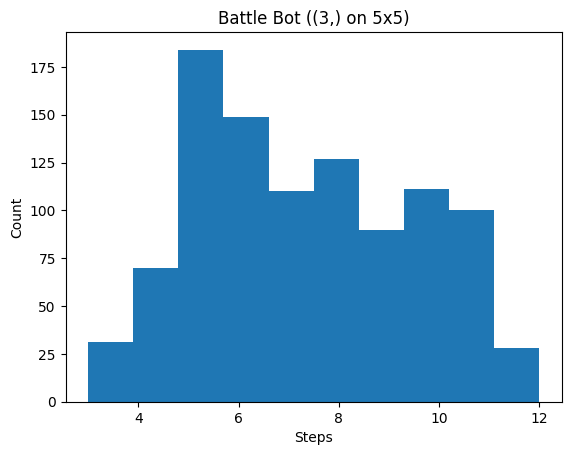

In [256]:
# BATTLE BOT DEMO DISTRIBUTION
from matplotlib import pyplot

# reset
battle_ship_env.reset()
replay_buffer.clear()

# run
trained_step_counts = []
for _ in range(FINAL_EVALUATION_EPISODES):
    battle_ship_env.reset()
    replay_buffer.clear()
    driver.run(num_episodes = 1)
    trajectory = replay_buffer.gather_all()
    trained_step_count = trajectory.step_type.shape[1] - 1
    trained_step_counts.append(trained_step_count)

# summary statistics
step_count_mean = numpy.mean(trained_step_counts)
step_count_standard_deviation = numpy.std(trained_step_counts)
fig_text = "{step_count_mean} mean, {step_count_standard_deviation} stdev"

pyplot.title(f"Battle Bot ({SHIP_SIZES} on {BOARD_SIZE}x{BOARD_SIZE}): {step_count_mean:.1f} mean, {step_count_standard_deviation:.1f} stdev")
pyplot.xlabel("Steps")
pyplot.ylabel("Count")
pyplot.hist(trained_step_counts)

# Battle Bot Discussion

## Sources
https://towardsdatascience.com/an-artificial-intelligence-learns-to-play-battleship-ebd2cf9adb01#89b2
- used linear qn
- goal of winning is sparse, so this author used reward shaping hard
  - copied reward structure from here
- [3, ] on 5x5 in 7 steps with 900k episodes
- [3, ] on 6x6 in 10 steps with 5M episodes
- 7x7 failed to converge
- code link does not work

https://www.ga-ccri.com/deep-reinforcement-learning-win-battleship
- used dqn
- [2, 3, 3, 4, 5] on 10x10 in 52 steps ... with no network architecture, code, or other details

https://github.com/rshnn/battleship
- tried heatmap, search/hunt, and ppo
- ppo performed worse than non-rl methods
- reward given instead of step count, so cannot compare

https://www.efavdb.com/battleship
- uses vanilla policy gradient
- based on tf1
  - failed to reproduce within reasonable time frame
- [3, ] on 10x10 in 5 steps ... unbelievable

# Improvements
- Try full battleship with 10x10 board
  - Takes 24h with i7-3740QM, but seems to converge even with current hyperparameters
- Use Gaussian hyper parameter optimization with early-stopping for ease
  - Generally, to reduce human error, save policies/parameters, and improve stability
  - Specifically with miss / hit / win reward shaping hyperparameters
    - With average step count being the real goal
- Subclass the models to implement custom action / value networks
  - Not performed to avoid dealing with tf_agents' inelegant interface
  - Convolution layers could have increased performance and convergence with spatial feature recognition
  - Action masking could have removed the "illegal move" punishment, reduced training time, and reduced average step count with no need for stochastic action selection
  - Action masking is masking the output action distribution with known constraints / inefficients (like not clicking the same square repeatedly)
    - tf_agents.networks.mask_splitter_network.MaskSplitterNetwork
- Try off-policy techniques like DQN or its variants
  - PPO was chosen because episodes are easily sampled and wall-time is more important
  - But the off-policy methods performed well according to the sources

In [ ]:
# BATTLE BOT DEBUGGING

# network architectures
for layer in actor_network.layers:
    print(layer.summary())
for layer in value_network.layers:
    if not isinstance(layer, tensorflow.keras.layers.Dense):
        print(layer.summary())
    else:
        print(layer.get_config())

# specs because driver shape error
print(battle_bot.collect_data_spec)
print("")
print(battle_ship_env.time_step_spec())
print(battle_ship_env.action_spec())
print(battle_ship_env.observation_spec())
print("")
print(battle_ship_env.current_time_step())
print(battle_ship_env.current_time_step().observation)

# class types because suspect tfpy environment conflicting
print(type(battle_ship_env))
print(type(battle_bot.policy))
print(type(replay_buffer.add_batch))

Model: "EncodingNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  6464      
Total params: 6,464
Trainable params: 6,464
Non-trainable params: 0
_________________________________________________________________
None
Model: "CategoricalProjectionNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
logits (Dense)               multiple                  6500      
Total params: 6,500
Trainable params: 6,500
Non-trainable params: 0
_________________________________________________________________
None
Model: "EncodingNetwork"
_________________________________________________________________
Layer (type)                 Output Shap